In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
df_train = pd.read_csv('/content/train.csv',low_memory=False)
df_test = pd.read_csv('/content/test.csv',low_memory=False)

In [51]:
df_train.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [52]:
# Check for missing values
df_train.isnull().sum()

,0
team,0
conf,0
GP,0
Min_per,0
Ortg,0
...,...
stl,36
blk,36
pts,36
player_id,0


In [53]:
# Check data types
df_train.dtypes



,0
team,object
conf,object
GP,int64
Min_per,float64
Ortg,float64
...,...
stl,float64
blk,float64
pts,float64
player_id,object


In [54]:
# Summary statistics
df_train.describe()


,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,...,46576.000000,46576.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46618.000000
mean,23.542988,37.339013,91.784360,18.164578,44.424392,47.571397,5.654071,12.575102,10.923008,20.535915,...,-2.088273,-0.463778,0.778630,1.867124,2.645755,1.066943,0.527743,0.283606,5.732429,0.009524
std,10.076829,28.019801,30.235568,6.181982,18.026404,17.217909,9.985025,11.041089,9.430012,12.210669,...,6.160620,3.303826,0.745045,1.464894,2.096319,1.170469,0.469654,0.422755,4.942544,0.097127
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,9.600000,83.900000,14.600000,40.000000,43.770000,1.900000,8.400000,4.600000,14.900000,...,-4.463895,-1.747553,0.228600,0.681800,1.000000,0.217400,0.157900,0.000000,1.538500,0.000000
50%,28.000000,35.900000,97.000000,18.100000,47.500000,50.720000,4.500000,11.800000,9.100000,19.300000,...,-1.581525,-0.335180,0.550000,1.600000,2.235300,0.666700,0.419400,0.131600,4.428600,0.000000
75%,31.000000,62.200000,106.800000,21.800000,53.000000,55.947500,8.200000,15.900000,15.200000,24.700000,...,1.018088,1.048375,1.129000,2.724100,3.806500,1.529000,0.793100,0.366700,9.033050,0.000000
max,41.000000,98.000000,834.000000,50.000000,150.000000,150.000000,1576.600000,1385.000000,100.000000,100.000000,...,225.485000,78.985500,5.933300,11.545500,14.533300,10.000000,4.000000,5.258100,29.968800,1.000000


In [55]:
# Check for duplicates
df_train.duplicated().sum()

0

In [56]:
#  print distinct values of categorical features

# Select categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns

# Print distinct values for each categorical feature
for feature in categorical_features:
  print(f"Distinct values for {feature}:")
  print(df_train[feature].unique())
  print("\n")


Distinct values for team:
['South Alabama' 'Utah St.' 'South Florida' 'Pepperdine' 'Pacific'
 'Butler' 'Longwood' 'Fordham' 'Wagner' 'Pittsburgh' 'Connecticut'
 'North Carolina St.' 'Chicago St.' 'LSU' 'Boston University' 'Detroit'
 'Albany' 'Manhattan' 'Navy' "Saint Mary's" 'Alabama A&M' 'Hofstra'
 'James Madison' 'Missouri St.' 'Alabama' 'Boston College' 'Drexel'
 'Binghamton' 'Bowling Green' 'Maryland' 'Colorado' 'Southern Miss'
 'Old Dominion' 'Cal St. Fullerton' 'Oregon St.' 'St. Francis PA'
 'Southern Illinois' 'Loyola Chicago' 'Indiana' 'Hawaii' 'Elon'
 'Holy Cross' 'Vanderbilt' 'VCU' 'Monmouth' 'North Carolina A&T' 'Lamar'
 'Howard' 'Furman' 'George Mason' 'Louisiana Lafayette' 'Marquette'
 'Central Connecticut' 'Providence' 'Princeton' 'Virginia' 'Georgia St.'
 'UAB' 'Florida St.' 'Duke' 'Purdue' 'New Orleans' 'Notre Dame' 'Wofford'
 'California' 'Arizona' 'UTEP' 'Centenary' 'Appalachian St.' 'Brown'
 'Illinois Chicago' 'Bucknell' 'Long Beach St.' 'Richmond' 'Seton Hall'
 'Aub

In [57]:
# print head for column ht

print(df_train['ht'].head())


0    2-Jun
1    4-Jun
2    4-Jun
3    4-Jun
4    8-Jun
Name: ht, dtype: object


In [58]:
# print the occurance of each value for column num

print(df_train['type'].value_counts())


type
all    46618
Name: count, dtype: int64


In [59]:
# drop every categorical column except player_id and yr, also convert yr to one hot encoding for further analysis but remove the entries which are  '0' nan '57.1' '42.9' first

# Remove rows with specified values in 'yr' column
df_train = df_train[~df_train['yr'].isin(['0', np.nan, '57.1', '42.9'])]

# Drop categorical columns except 'player_id' and 'yr'
categorical_features = df_train.select_dtypes(include=['object']).columns
columns_to_drop = [col for col in categorical_features if col not in ['player_id', 'yr']]
df_train = df_train.drop(columns=columns_to_drop)

# Convert 'yr' to one-hot encoding
df_train = pd.get_dummies(df_train, columns=['yr'])


In [60]:
# replace null values with median values or mode

# Fill missing values with median for numerical features
numerical_features = df_train.select_dtypes(include=['number']).columns
for feature in numerical_features:
  df_train[feature] = df_train[feature].fillna(df_train[feature].median())

# Fill missing values with mode for categorical features
categorical_features = df_train.select_dtypes(include=['object']).columns
for feature in categorical_features:
  df_train[feature] = df_train[feature].fillna(df_train[feature].mode()[0])


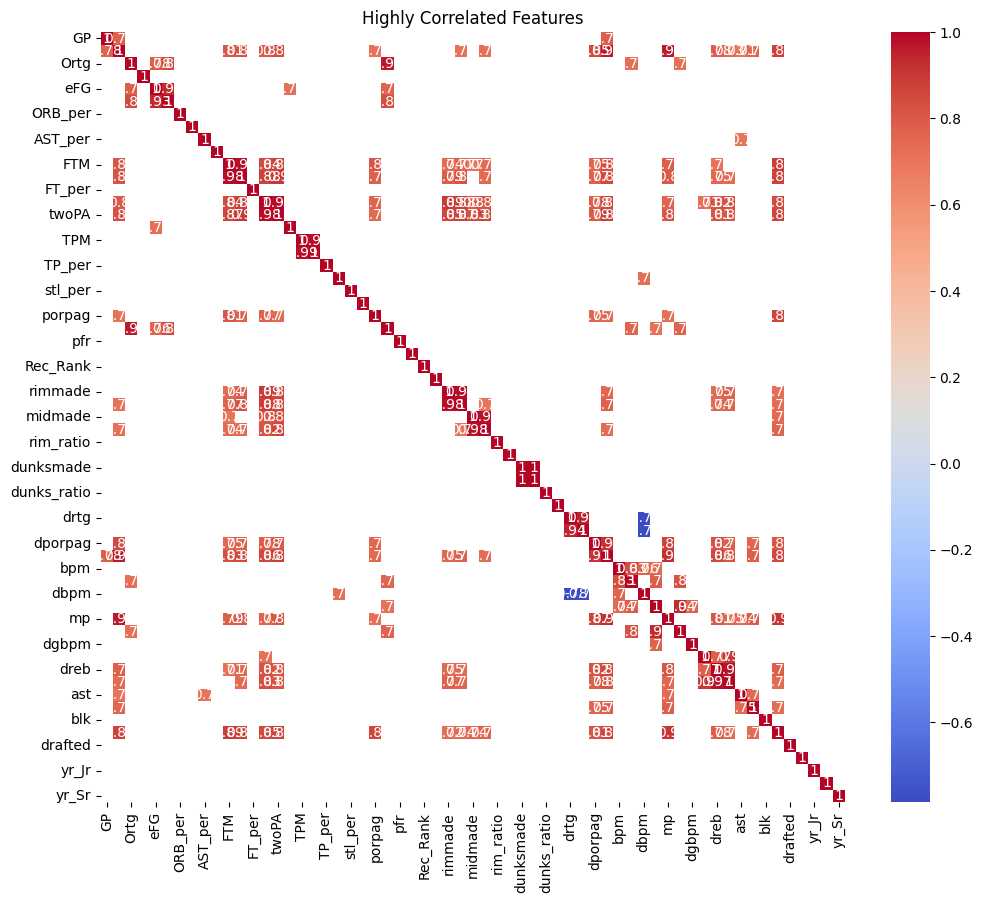

In [61]:
#code to print heatmap only for highly correlated features 

# Calculate correlation matrix
corr_matrix = df_train.drop('player_id', axis=1).corr()

# Filter for highly correlated features (threshold = 0.7)
highly_correlated_features = corr_matrix[abs(corr_matrix) > 0.7]

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(highly_correlated_features, annot=True, cmap='coolwarm')
plt.title('Highly Correlated Features')
plt.show()


In [62]:
#code to deal with highly correlated columns for both test and train

# Identify highly correlated features
corr_matrix = df_train.drop('player_id', axis=1).corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Use bool instead of np.bool
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]


# Drop highly correlated features from both training and test sets
df_train = df_train.drop(columns=to_drop)
df_test = df_test.drop(columns=to_drop)


In [63]:

from sklearn.preprocessing import StandardScaler

# Separate target variable
y = df_train['drafted']
X = df_train.drop(['drafted', 'player_id'], axis=1)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [64]:
df_test['num'].head()

,num
0,25.0
1,0.0
2,32.0
3,32.0
4,5.0


In [65]:
import pandas as pd
import numpy as np

# Temporary store 'player_id' column
player_ids = df_test['player_id']
print(f"Row count after storing 'player_id': {df_test.shape[0]}")

# Replace specified values in 'yr' column with the most common value
mode_value = df_test['yr'].mode()[0]
df_test['yr'] = df_test['yr'].replace(['0', np.nan, '57.1', '42.9'], mode_value)

# Drop categorical columns except 'yr' and 'player_id'
categorical_features = df_test.select_dtypes(include=['object']).columns
columns_to_drop = [col for col in categorical_features if col not in ['yr', 'player_id']]
df_test = df_test.drop(columns=columns_to_drop)
print(f"Row count after dropping categorical columns: {df_test.shape[0]}")

# Convert 'yr' to one-hot encoding
df_test = pd.get_dummies(df_test, columns=['yr'])
print(f"Row count after one-hot encoding 'yr': {df_test.shape[0]}")

# Fill missing values with median for numerical features
numerical_features = df_test.select_dtypes(include=['number']).columns
for feature in numerical_features:
    df_test[feature] = df_test[feature].fillna(df_test[feature].median())
print(f"Row count after filling missing numerical values: {df_test.shape[0]}")

# Fill missing values with mode for remaining categorical features
categorical_features = df_test.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])
print(f"Row count after filling missing categorical values: {df_test.shape[0]}")

# Drop 'num' column if it exists
if 'num' in df_test.columns:
    df_test = df_test.drop('num', axis=1)
    print(f"Row count after dropping 'num' column: {df_test.shape[0]}")

# Remove 'player_id' column before processing
df_test = df_test.drop('player_id', axis=1)
print(f"Row count after dropping 'player_id': {df_test.shape[0]}")

# Scale the data (assuming `scaler` has already been fitted on training data)
X_test_scaled = scaler.transform(df_test)
print(f"Row count after scaling: {df_test.shape[0]}")


Row count after storing 'player_id': 4970
Row count after dropping categorical columns: 4970
Row count after one-hot encoding 'yr': 4970
Row count after filling missing numerical values: 4970
Row count after filling missing categorical values: 4970
Row count after dropping 'num' column: 4970
Row count after dropping 'player_id': 4970
Row count after scaling: 4970


In [68]:
# random forest

from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("Random Forest ROC AUC Score:", roc_auc_rf)



Random Forest ROC AUC Score: 0.9981635812635878
SVM ROC AUC Score: 0.9910161812625743
KNN ROC AUC Score: 0.9277354340764314


In [70]:
#export the result of random forest for test data as player_id and predicted data

# Make predictions on the test set using the Random Forest model
y_pred_prob_rf_test = rf_model.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame with player_id and predicted probabilities
rf_submission_df = pd.DataFrame({'player_id': player_ids, 'drafted': y_pred_prob_rf_test})

# Save the DataFrame to a CSV file
rf_submission_df.to_csv('rf_submission.csv', index=False)
